In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/keypoints_final_256.csv')
df_test = pd.read_csv('/content/drive/MyDrive/keypoints_final_test_256.csv')

In [ ]:
df = df.drop('Unnamed: 0',1)
df_test = df_test.drop('Unnamed: 0',1)

<ipython-input-4-2408e182c2cf>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0',1)
<ipython-input-4-2408e182c2cf>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_test = df_test.drop('Unnamed: 0',1)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,1.1
0,0.561012,0.302157,-0.123826,0.564638,0.289460,-0.105465,0.567299,0.289761,-0.105632,0.569772,...,0.533098,0.883884,0.116445,0.566635,0.933335,0.036987,0.536138,0.938561,-0.000178,tadasana
1,0.561800,0.300378,-0.112502,0.564178,0.286860,-0.094147,0.566694,0.287539,-0.094309,0.568935,...,0.532270,0.883887,0.118631,0.570173,0.931963,0.035905,0.532538,0.933740,-0.001898,tadasana
2,0.561128,0.303233,-0.398081,0.564855,0.286085,-0.388905,0.567303,0.285346,-0.389124,0.569531,...,0.527861,0.878289,0.133518,0.566152,0.918341,0.058699,0.534654,0.928207,-0.001211,tadasana
3,0.560880,0.309663,-0.300727,0.564582,0.291333,-0.289611,0.567254,0.290768,-0.289883,0.570002,...,0.536183,0.912010,0.188811,0.567818,0.914286,0.152388,0.530323,0.931029,0.077729,tadasana
4,0.561824,0.313649,-0.342597,0.565599,0.294846,-0.333475,0.568605,0.294382,-0.333750,0.571083,...,0.540910,0.887583,0.192771,0.571397,0.923574,0.116451,0.531012,0.930395,0.070042,tadasana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13124,0.486648,0.286260,-0.089110,0.490879,0.273558,-0.067470,0.493832,0.272559,-0.067595,0.497064,...,0.470475,0.872472,0.102894,0.496999,0.912968,0.022522,0.466042,0.915865,-0.025367,tadasana
13125,0.482443,0.300422,-0.362747,0.487832,0.286010,-0.350695,0.491121,0.285521,-0.350950,0.493022,...,0.474411,0.877378,0.126974,0.494784,0.912487,0.072589,0.465412,0.914555,0.006590,tadasana
13126,0.480868,0.294958,-0.321305,0.485442,0.280226,-0.312262,0.488200,0.280182,-0.312505,0.491096,...,0.473303,0.876180,0.188003,0.495985,0.914854,0.099370,0.465068,0.916696,0.075990,tadasana
13127,0.476346,0.293068,-0.347669,0.480525,0.276444,-0.338560,0.483666,0.276016,-0.338818,0.485902,...,0.473899,0.877159,0.200288,0.494451,0.915021,0.085202,0.464427,0.913910,0.084059,tadasana


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import LabelEncoder

In [ ]:
lbe = LabelEncoder()
df['1.1']= lbe.fit_transform(df['1.1'])
df_test['1.1']= lbe.fit_transform(df_test['1.1'])
dict(zip(lbe.classes_, lbe.transform(lbe.classes_)))

{'bhujan': 0, 'padmasan': 1, 'shav': 2, 'tadasana': 3, 'trik': 4, 'vriksh': 5}

In [ ]:
target = ['bhujan', 'padmasan', 'shav', 'tadasana','trik', 'vriksh' ]

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
class YogaDataset(Dataset):
  def __init__(self, df):
    self.features = df.drop(['1.1'], axis=1)
    self.target = df['1.1']

  def __len__(self):
    return len(self.features)
  
  def __getitem__(self, index):
    features = self.features.loc[index]
    target = self.target[index]
    return torch.tensor(features.tolist()).float().to(device), torch.tensor(target).long().to(device)

In [ ]:
# df_feat = df.drop(['1.1'], axis=1)

In [ ]:
device

'cpu'

In [ ]:
# target = df['1.1']

In [ ]:
data = YogaDataset(df)

In [ ]:
feat, target = data[100]

In [ ]:
target

tensor(3)

In [ ]:
class RNN(nn.Module):
  def __init__(self,hidden_dim=80, input_dim=99, sequence_num=16, n_layers=1):
    super(RNN, self).__init__()
    self.input_dim = input_dim
    self.sequence_num = sequence_num
    self.n_layers = n_layers
    self.hidden_dim = hidden_dim
    self.rnn = nn.LSTM(input_dim,hidden_dim, n_layers, batch_first=True)
    self.fc = nn.Linear(hidden_dim, 64)
    self.fc1 = nn.Linear(64,20)
    self.fc2 = nn.Linear(20,6) 
  def forward(self, input):
    h0 = torch.zeros(self.n_layers,  self.hidden_dim)
    c0 = torch.zeros(self.n_layers,  self.hidden_dim)
    out,( _,_) = self.rnn(input,(h0, c0))
    pred = self.fc(out)
    pred = self.fc1(pred)
    pred = self.fc2(pred)
    output = nn.Softmax( dim=1)(pred)
    return output

In [ ]:
model = RNN().to(device)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adagrad(model.parameters(), lr=1e-3)

In [ ]:

model

RNN(
  (rnn): LSTM(99, 80, batch_first=True)
  (fc): Linear(in_features=80, out_features=64, bias=True)
  (fc1): Linear(in_features=64, out_features=20, bias=True)
  (fc2): Linear(in_features=20, out_features=6, bias=True)
)

In [ ]:
def get_data():
    train = YogaDataset(df)
    test = YogaDataset(df_test)
    trn_dl = DataLoader(train, batch_size=16,shuffle=True, drop_last=True)
    test_dl = DataLoader(test, batch_size=16, shuffle=True, drop_last=True)
    return trn_dl, test_dl

In [ ]:
trn_ldr, test_ldr = get_data()
# for x in trn_ldr:
#   print(x)
#   break

In [ ]:
def train_batch(x, y, model, loss_fn, opt):
    model.train()
    prediction = model(x)
    # print(y.shape)
    # print(y)
    # print(prediction.shape)
    batch_loss = loss_fn(prediction, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

In [ ]:
@torch.no_grad()
def accuracy(x, y, model, test=False):
    model.eval()
    pred = model(x)
    _, is_correct = torch.max(pred.data,1)
    acc_all = (is_correct==y).detach().cpu().numpy()
    if test==True:
      return acc_all, is_correct
    else:
      return acc_all

In [ ]:
@torch.no_grad()
def val_loss_trn(x, y, model, loss_fn):
  prediction = model(x)
  val_loss = loss_fn(prediction, y)
  return val_loss.item()

Epoch: _________*****0*****_______
Epoch: _________*****0 Training Loss : 1.672861238659882 *****_______
Epoch: _________*****0 Training Accuracy: 0.5074695121951219 *****_______
Epoch: _________*****0 Validation Loss : 1.56093035591604 *****_______
Epoch: _________*****0 Validation Accuracy. 0.5174216027874564 *****_______




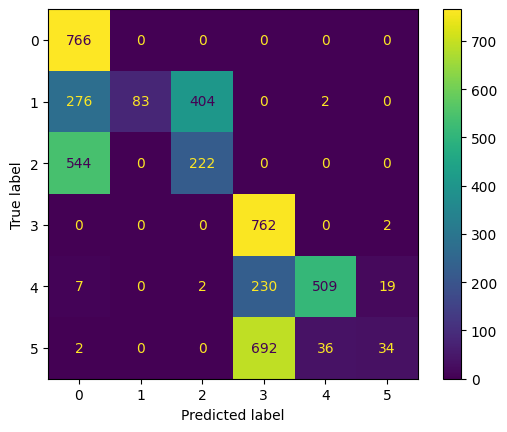

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       766
           1       1.00      0.11      0.20       765
           2       0.35      0.29      0.32       766
           3       0.45      1.00      0.62       764
           4       0.93      0.66      0.77       767
           5       0.62      0.04      0.08       764

    accuracy                           0.52      4592
   macro avg       0.64      0.52      0.44      4592
weighted avg       0.64      0.52      0.44      4592

Epoch: _________*****1*****_______
Epoch: _________*****1 Training Loss : 1.4568391398685734 *****_______
Epoch: _________*****1 Training Accuracy: 0.8125762195121952 *****_______
Epoch: _________*****1 Validation Loss : 1.3689252686417477 *****_______
Epoch: _________*****1 Validation Accuracy. 0.8804442508710801 *****_______




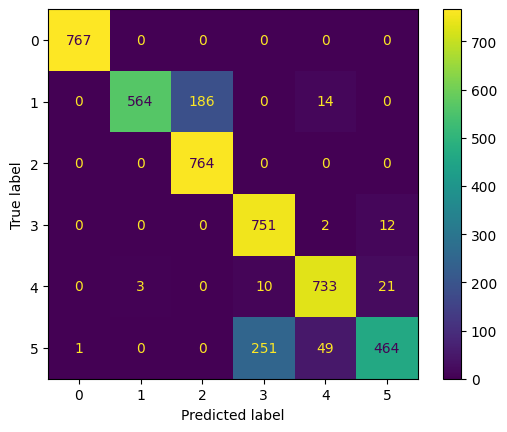

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       0.99      0.74      0.85       764
           2       0.80      1.00      0.89       764
           3       0.74      0.98      0.85       765
           4       0.92      0.96      0.94       767
           5       0.93      0.61      0.74       765

    accuracy                           0.88      4592
   macro avg       0.90      0.88      0.88      4592
weighted avg       0.90      0.88      0.88      4592

Epoch: _________*****2*****_______
Epoch: _________*****2 Training Loss : 1.3232195890531306 *****_______
Epoch: _________*****2 Training Accuracy: 0.8935213414634147 *****_______
Epoch: _________*****2 Validation Loss : 1.2639958883411793 *****_______
Epoch: _________*****2 Validation Accuracy. 0.9472996515679443 *****_______




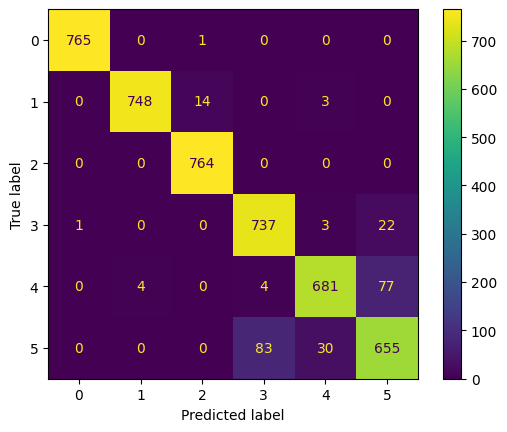

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       766
           1       0.99      0.98      0.99       765
           2       0.98      1.00      0.99       764
           3       0.89      0.97      0.93       763
           4       0.95      0.89      0.92       766
           5       0.87      0.85      0.86       768

    accuracy                           0.95      4592
   macro avg       0.95      0.95      0.95      4592
weighted avg       0.95      0.95      0.95      4592

Epoch: _________*****3*****_______
Epoch: _________*****3 Training Loss : 1.2440729709660134 *****_______
Epoch: _________*****3 Training Accuracy: 0.9257621951219512 *****_______
Epoch: _________*****3 Validation Loss : 1.2110749886010996 *****_______
Epoch: _________*****3 Validation Accuracy. 0.9405487804878049 *****_______




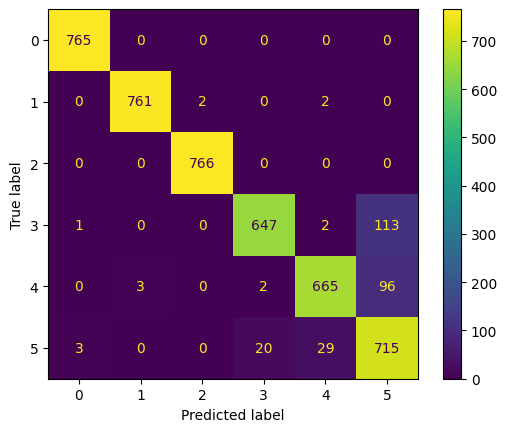

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       765
           1       1.00      0.99      1.00       765
           2       1.00      1.00      1.00       766
           3       0.97      0.85      0.90       763
           4       0.95      0.87      0.91       766
           5       0.77      0.93      0.85       767

    accuracy                           0.94      4592
   macro avg       0.95      0.94      0.94      4592
weighted avg       0.95      0.94      0.94      4592

Epoch: _________*****4*****_______
Epoch: _________*****4 Training Loss : 1.1994981554950155 *****_______
Epoch: _________*****4 Training Accuracy: 0.9299542682926829 *****_______
Epoch: _________*****4 Validation Loss : 1.1843469180296522 *****_______
Epoch: _________*****4 Validation Accuracy. 0.936411149825784 *****_______




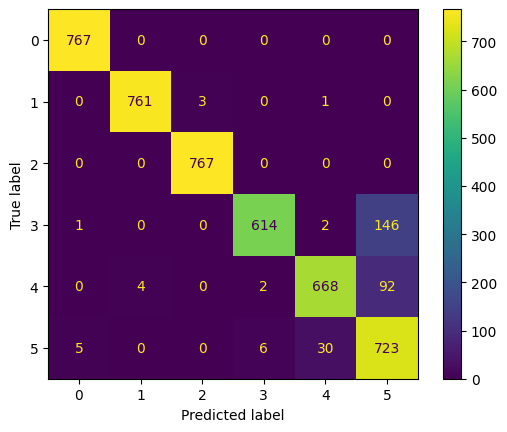

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       767
           1       0.99      0.99      0.99       765
           2       1.00      1.00      1.00       767
           3       0.99      0.80      0.89       763
           4       0.95      0.87      0.91       766
           5       0.75      0.95      0.84       764

    accuracy                           0.94      4592
   macro avg       0.95      0.94      0.94      4592
weighted avg       0.95      0.94      0.94      4592

Epoch: _________*****5*****_______
Epoch: _________*****5 Training Loss : 1.173877900984229 *****_______
Epoch: _________*****5 Training Accuracy: 0.9339176829268293 *****_______
Epoch: _________*****5 Validation Loss : 1.162906313191723 *****_______
Epoch: _________*****5 Validation Accuracy. 0.9370644599303136 *****_______




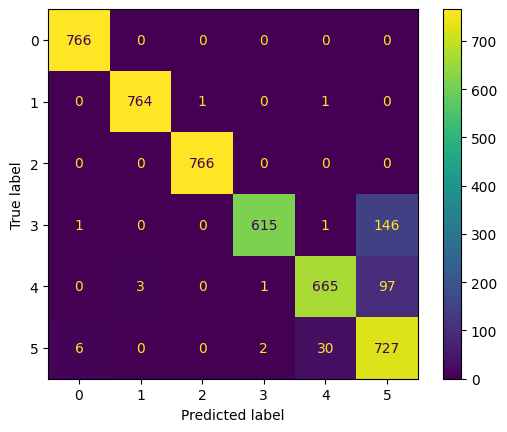

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       766
           1       1.00      1.00      1.00       766
           2       1.00      1.00      1.00       766
           3       1.00      0.81      0.89       763
           4       0.95      0.87      0.91       766
           5       0.75      0.95      0.84       765

    accuracy                           0.94      4592
   macro avg       0.95      0.94      0.94      4592
weighted avg       0.95      0.94      0.94      4592

Epoch: _________*****6*****_______
Epoch: _________*****6 Training Loss : 1.158349811013152 *****_______
Epoch: _________*****6 Training Accuracy: 0.9364329268292683 *****_______
Epoch: _________*****6 Validation Loss : 1.1545184684547398 *****_______
Epoch: _________*****6 Validation Accuracy. 0.9327090592334495 *****_______




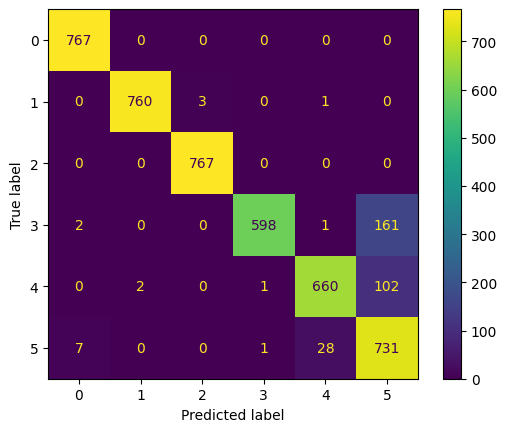

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       767
           1       1.00      0.99      1.00       764
           2       1.00      1.00      1.00       767
           3       1.00      0.78      0.88       762
           4       0.96      0.86      0.91       765
           5       0.74      0.95      0.83       767

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.93      4592
weighted avg       0.94      0.93      0.93      4592

Epoch: _________*****7*****_______
Epoch: _________*****7 Training Loss : 1.147320405157601 *****_______
Epoch: _________*****7 Training Accuracy: 0.9359756097560976 *****_______
Epoch: _________*****7 Validation Loss : 1.1438731532478996 *****_______
Epoch: _________*****7 Validation Accuracy. 0.9357578397212544 *****_______




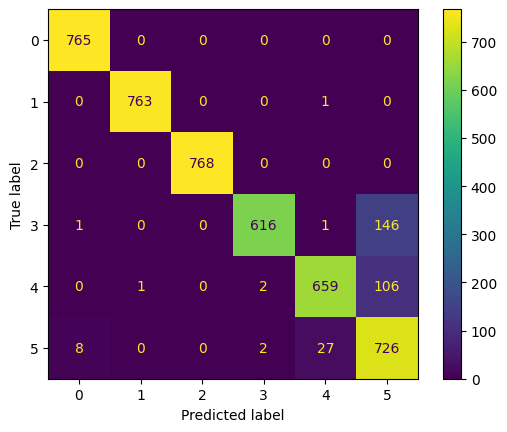

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       765
           1       1.00      1.00      1.00       764
           2       1.00      1.00      1.00       768
           3       0.99      0.81      0.89       764
           4       0.96      0.86      0.91       768
           5       0.74      0.95      0.83       763

    accuracy                           0.94      4592
   macro avg       0.95      0.94      0.94      4592
weighted avg       0.95      0.94      0.94      4592

Epoch: _________*****8*****_______
Epoch: _________*****8 Training Loss : 1.1389479590625298 *****_______
Epoch: _________*****8 Training Accuracy: 0.940625 *****_______
Epoch: _________*****8 Validation Loss : 1.1391333437132087 *****_______
Epoch: _________*****8 Validation Accuracy. 0.9348867595818815 *****_______




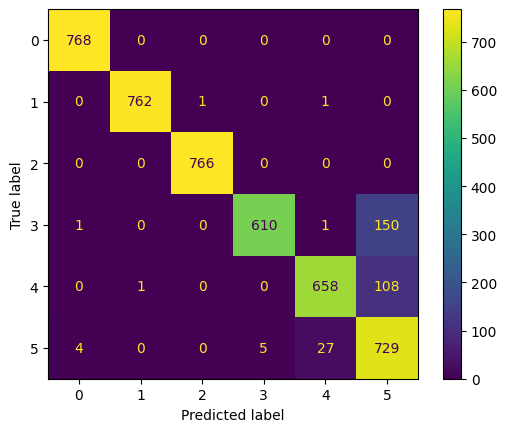

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       768
           1       1.00      1.00      1.00       764
           2       1.00      1.00      1.00       766
           3       0.99      0.80      0.89       762
           4       0.96      0.86      0.91       767
           5       0.74      0.95      0.83       765

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.94      4592
weighted avg       0.95      0.93      0.94      4592

Epoch: _________*****9*****_______
Epoch: _________*****9 Training Loss : 1.132879811525345 *****_______
Epoch: _________*****9 Training Accuracy: 0.9458841463414634 *****_______
Epoch: _________*****9 Validation Loss : 1.1389989894441612 *****_______
Epoch: _________*****9 Validation Accuracy. 0.9305313588850174 *****_______




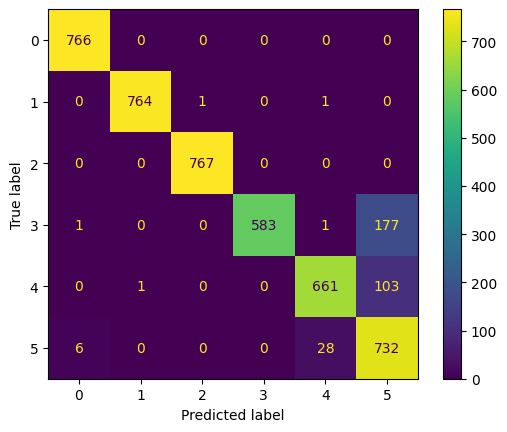

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       766
           1       1.00      1.00      1.00       766
           2       1.00      1.00      1.00       767
           3       1.00      0.77      0.87       762
           4       0.96      0.86      0.91       765
           5       0.72      0.96      0.82       766

    accuracy                           0.93      4592
   macro avg       0.94      0.93      0.93      4592
weighted avg       0.94      0.93      0.93      4592

Epoch: _________*****10*****_______
Epoch: _________*****10 Training Loss : 1.1283906943914368 *****_______
Epoch: _________*****10 Training Accuracy: 0.9438262195121951 *****_______
Epoch: _________*****10 Validation Loss : 1.1325761877285894 *****_______
Epoch: _________*****10 Validation Accuracy. 0.9355400696864111 *****_______




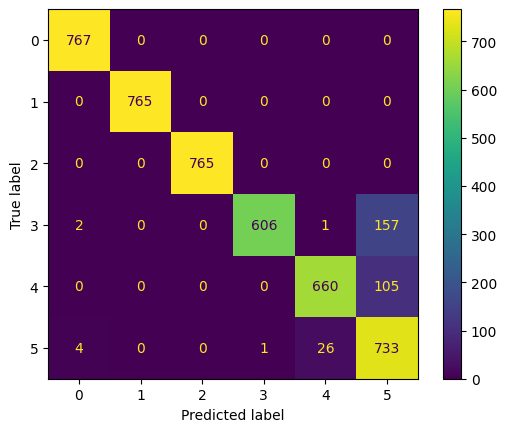

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       767
           1       1.00      1.00      1.00       765
           2       1.00      1.00      1.00       765
           3       1.00      0.79      0.88       766
           4       0.96      0.86      0.91       765
           5       0.74      0.96      0.83       764

    accuracy                           0.94      4592
   macro avg       0.95      0.94      0.94      4592
weighted avg       0.95      0.94      0.94      4592

Epoch: _________*****11*****_______
Epoch: _________*****11 Training Loss : 1.1236609989550055 *****_______
Epoch: _________*****11 Training Accuracy: 0.9448170731707317 *****_______
Epoch: _________*****11 Validation Loss : 1.1284603952115422 *****_______
Epoch: _________*****11 Validation Accuracy. 0.9388066202090593 *****_______




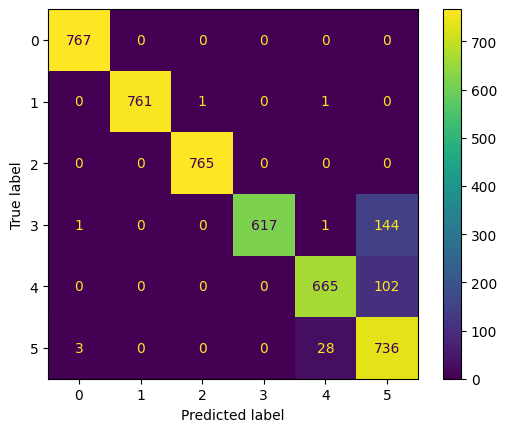

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       767
           1       1.00      1.00      1.00       763
           2       1.00      1.00      1.00       765
           3       1.00      0.81      0.89       763
           4       0.96      0.87      0.91       767
           5       0.75      0.96      0.84       767

    accuracy                           0.94      4592
   macro avg       0.95      0.94      0.94      4592
weighted avg       0.95      0.94      0.94      4592

Epoch: _________*****12*****_______
Epoch: _________*****12 Training Loss : 1.1205132762106453 *****_______
Epoch: _________*****12 Training Accuracy: 0.9494664634146341 *****_______
Epoch: _________*****12 Validation Loss : 1.127976985343242 *****_______
Epoch: _________*****12 Validation Accuracy. 0.9337979094076655 *****_______




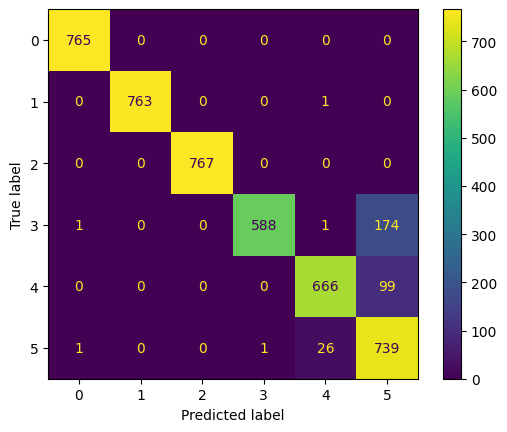

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00       764
           2       1.00      1.00      1.00       767
           3       1.00      0.77      0.87       764
           4       0.96      0.87      0.91       765
           5       0.73      0.96      0.83       767

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.94      4592
weighted avg       0.95      0.93      0.94      4592

Epoch: _________*****13*****_______
Epoch: _________*****13 Training Loss : 1.117566263966444 *****_______
Epoch: _________*****13 Training Accuracy: 0.9512195121951219 *****_______
Epoch: _________*****13 Validation Loss : 1.1290367650653428 *****_______
Epoch: _________*****13 Validation Accuracy. 0.9318379790940766 *****_______




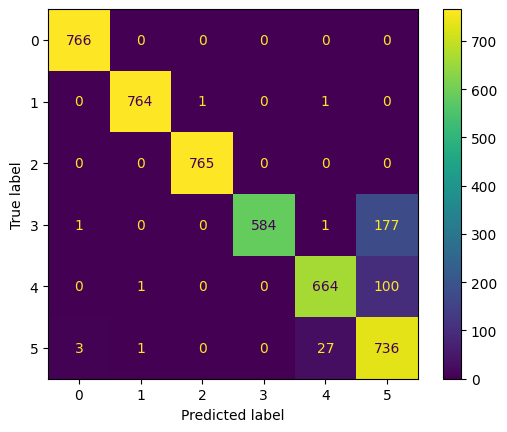

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       766
           1       1.00      1.00      1.00       766
           2       1.00      1.00      1.00       765
           3       1.00      0.77      0.87       763
           4       0.96      0.87      0.91       765
           5       0.73      0.96      0.83       767

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.93      4592
weighted avg       0.95      0.93      0.93      4592

Epoch: _________*****14*****_______
Epoch: _________*****14 Training Loss : 1.1148636506824958 *****_______
Epoch: _________*****14 Training Accuracy: 0.9538871951219512 *****_______
Epoch: _________*****14 Validation Loss : 1.1269574082271563 *****_______
Epoch: _________*****14 Validation Accuracy. 0.9331445993031359 *****_______




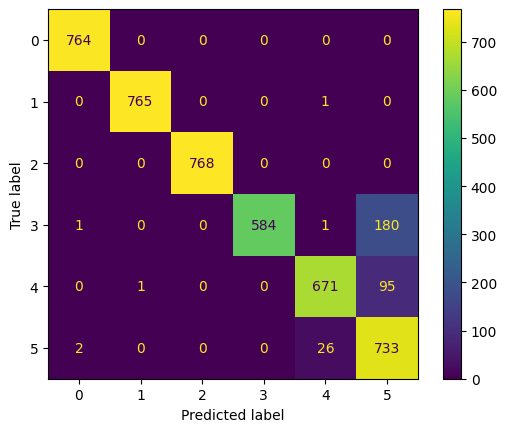

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       764
           1       1.00      1.00      1.00       766
           2       1.00      1.00      1.00       768
           3       1.00      0.76      0.87       766
           4       0.96      0.87      0.92       767
           5       0.73      0.96      0.83       761

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.93      4592
weighted avg       0.95      0.93      0.93      4592

Epoch: _________*****15*****_______
Epoch: _________*****15 Training Loss : 1.1128148243194673 *****_______
Epoch: _________*****15 Training Accuracy: 0.9516768292682927 *****_______
Epoch: _________*****15 Validation Loss : 1.1214514596952379 *****_______
Epoch: _________*****15 Validation Accuracy. 0.9366289198606271 *****_______




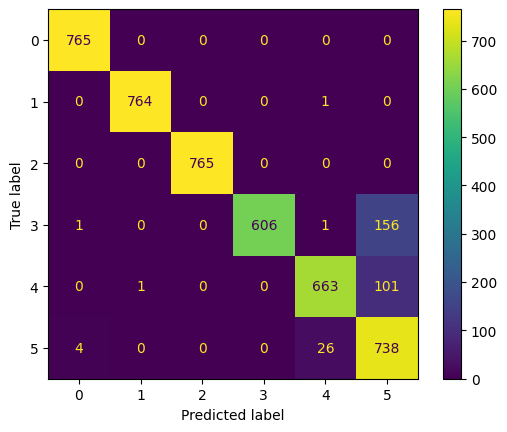

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       765
           1       1.00      1.00      1.00       765
           2       1.00      1.00      1.00       765
           3       1.00      0.79      0.88       764
           4       0.96      0.87      0.91       765
           5       0.74      0.96      0.84       768

    accuracy                           0.94      4592
   macro avg       0.95      0.94      0.94      4592
weighted avg       0.95      0.94      0.94      4592

Epoch: _________*****16*****_______
Epoch: _________*****16 Training Loss : 1.110845265737394 *****_______
Epoch: _________*****16 Training Accuracy: 0.9557926829268293 *****_______
Epoch: _________*****16 Validation Loss : 1.1239972010722143 *****_______
Epoch: _________*****16 Validation Accuracy. 0.9335801393728222 *****_______




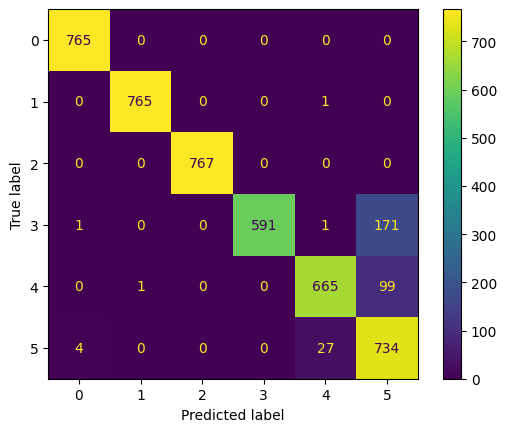

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       765
           1       1.00      1.00      1.00       766
           2       1.00      1.00      1.00       767
           3       1.00      0.77      0.87       764
           4       0.96      0.87      0.91       765
           5       0.73      0.96      0.83       765

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.93      4592
weighted avg       0.95      0.93      0.93      4592

Epoch: _________*****17*****_______
Epoch: _________*****17 Training Loss : 1.1086021980134453 *****_______
Epoch: _________*****17 Training Accuracy: 0.9573170731707317 *****_______
Epoch: _________*****17 Validation Loss : 1.1234418868187828 *****_______
Epoch: _________*****17 Validation Accuracy. 0.9303135888501742 *****_______




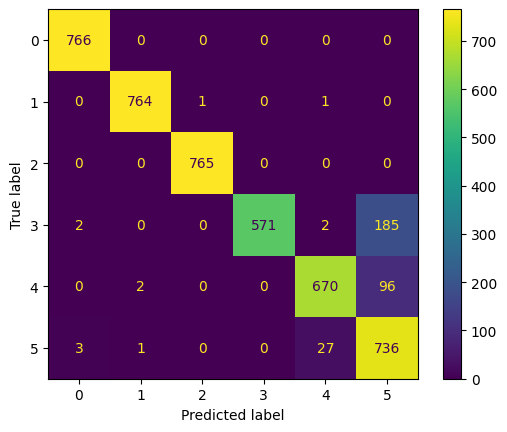

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       766
           1       1.00      1.00      1.00       766
           2       1.00      1.00      1.00       765
           3       1.00      0.75      0.86       760
           4       0.96      0.87      0.91       768
           5       0.72      0.96      0.83       767

    accuracy                           0.93      4592
   macro avg       0.94      0.93      0.93      4592
weighted avg       0.94      0.93      0.93      4592

Epoch: _________*****18*****_______
Epoch: _________*****18 Training Loss : 1.1075494962494548 *****_______
Epoch: _________*****18 Training Accuracy: 0.9570884146341463 *****_______
Epoch: _________*****18 Validation Loss : 1.1199626951682857 *****_______
Epoch: _________*****18 Validation Accuracy. 0.9316202090592335 *****_______




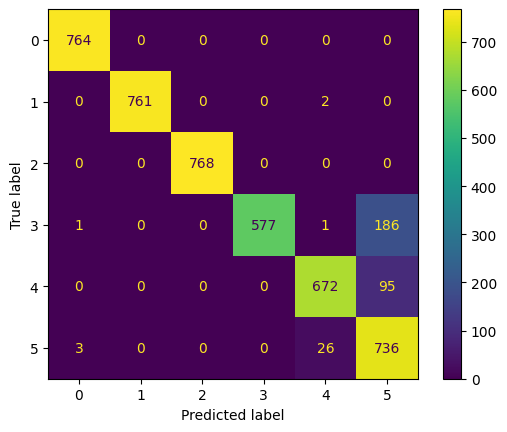

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       764
           1       1.00      1.00      1.00       763
           2       1.00      1.00      1.00       768
           3       1.00      0.75      0.86       765
           4       0.96      0.88      0.92       767
           5       0.72      0.96      0.83       765

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.93      4592
weighted avg       0.95      0.93      0.93      4592

Epoch: _________*****19*****_______
Epoch: _________*****19 Training Loss : 1.1059617347833588 *****_______
Epoch: _________*****19 Training Accuracy: 0.9588414634146342 *****_______
Epoch: _________*****19 Validation Loss : 1.1256298217208542 *****_______
Epoch: _________*****19 Validation Accuracy. 0.9250871080139372 *****_______




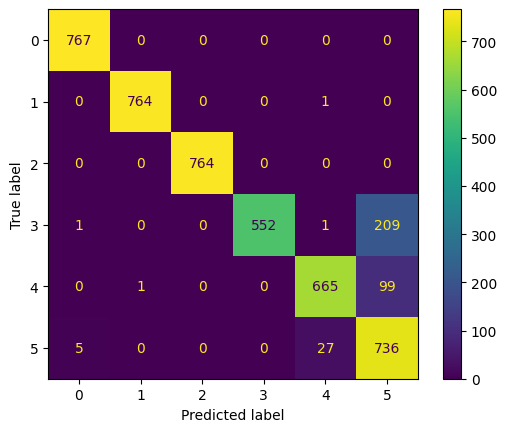

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       767
           1       1.00      1.00      1.00       765
           2       1.00      1.00      1.00       764
           3       1.00      0.72      0.84       763
           4       0.96      0.87      0.91       765
           5       0.70      0.96      0.81       768

    accuracy                           0.93      4592
   macro avg       0.94      0.92      0.93      4592
weighted avg       0.94      0.93      0.93      4592

Epoch: _________*****20*****_______
Epoch: _________*****20 Training Loss : 1.1046373900843829 *****_______
Epoch: _________*****20 Training Accuracy: 0.9604420731707317 *****_______
Epoch: _________*****20 Validation Loss : 1.123054839177414 *****_______
Epoch: _________*****20 Validation Accuracy. 0.9283536585365854 *****_______




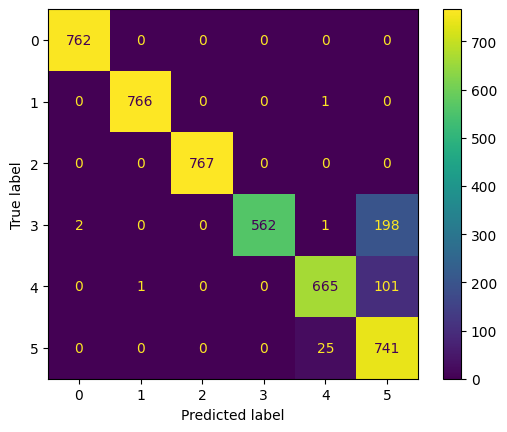

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       762
           1       1.00      1.00      1.00       767
           2       1.00      1.00      1.00       767
           3       1.00      0.74      0.85       763
           4       0.96      0.87      0.91       767
           5       0.71      0.97      0.82       766

    accuracy                           0.93      4592
   macro avg       0.94      0.93      0.93      4592
weighted avg       0.94      0.93      0.93      4592

Epoch: _________*****21*****_______
Epoch: _________*****21 Training Loss : 1.103503744922033 *****_______
Epoch: _________*****21 Training Accuracy: 0.9603658536585366 *****_______
Epoch: _________*****21 Validation Loss : 1.1208931323958606 *****_______
Epoch: _________*****21 Validation Accuracy. 0.9316202090592335 *****_______




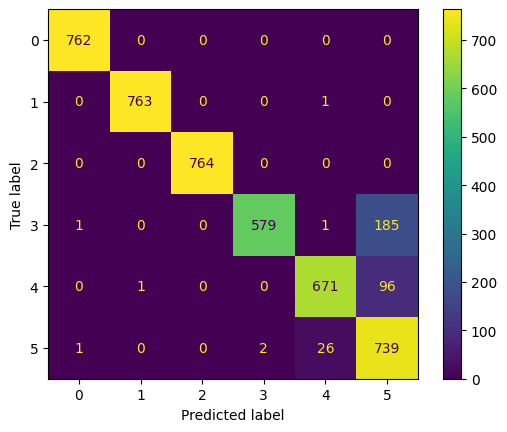

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       762
           1       1.00      1.00      1.00       764
           2       1.00      1.00      1.00       764
           3       1.00      0.76      0.86       766
           4       0.96      0.87      0.91       768
           5       0.72      0.96      0.83       768

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.93      4592
weighted avg       0.95      0.93      0.93      4592

Epoch: _________*****22*****_______
Epoch: _________*****22 Training Loss : 1.1025284163835571 *****_______
Epoch: _________*****22 Training Accuracy: 0.9602134146341463 *****_______
Epoch: _________*****22 Validation Loss : 1.1180971403985904 *****_______
Epoch: _________*****22 Validation Accuracy. 0.9331445993031359 *****_______




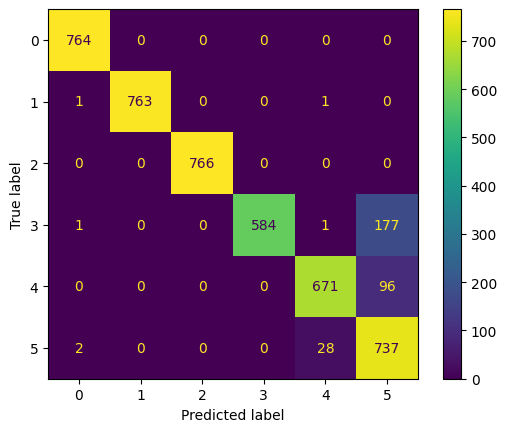

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       764
           1       1.00      1.00      1.00       765
           2       1.00      1.00      1.00       766
           3       1.00      0.77      0.87       763
           4       0.96      0.87      0.91       767
           5       0.73      0.96      0.83       767

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.93      4592
weighted avg       0.95      0.93      0.93      4592

Epoch: _________*****23*****_______
Epoch: _________*****23 Training Loss : 1.1010592371952244 *****_______
Epoch: _________*****23 Training Accuracy: 0.9604420731707317 *****_______
Epoch: _________*****23 Validation Loss : 1.1156492789863295 *****_______
Epoch: _________*****23 Validation Accuracy. 0.9342334494773519 *****_______




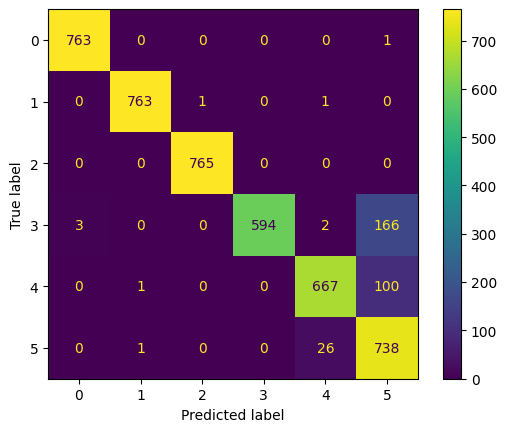

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       764
           1       1.00      1.00      1.00       765
           2       1.00      1.00      1.00       765
           3       1.00      0.78      0.87       765
           4       0.96      0.87      0.91       768
           5       0.73      0.96      0.83       765

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.94      4592
weighted avg       0.95      0.93      0.94      4592

Epoch: _________*****24*****_______
Epoch: _________*****24 Training Loss : 1.1004590339776947 *****_______
Epoch: _________*****24 Training Accuracy: 0.9615853658536585 *****_______
Epoch: _________*****24 Validation Loss : 1.1199005414384582 *****_______
Epoch: _________*****24 Validation Accuracy. 0.929006968641115 *****_______




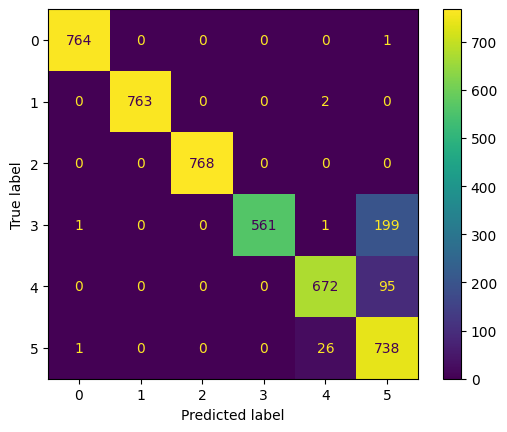

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00       765
           2       1.00      1.00      1.00       768
           3       1.00      0.74      0.85       762
           4       0.96      0.88      0.92       767
           5       0.71      0.96      0.82       765

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.93      4592
weighted avg       0.95      0.93      0.93      4592



In [ ]:
train_loss = []
train_accuracies= []
val_loss = [] 
val_accuracies = []

for i in range(25):
    y_pred= []
    y_true = []
    print(f'Epoch: _________*****{i}*****_______')
    train_epoch_losses, train_epoch_accuracies = [], []
    val_epoch_accuracies, val_epoch_losses = [], []



    for ix, batch in (enumerate(iter(trn_ldr))):

        x, y = batch
        train_epoch_losses.append(train_batch(x, y, model, loss_fn, optimizer))
    train_epoch_loss = np.array(train_epoch_losses).mean()
    print(f'Epoch: _________*****{i} Training Loss : {train_epoch_loss} *****_______')



    for ix, batch in (enumerate(iter(trn_ldr))):
        x, y = batch
        # x = x.permute(0, 3,1,2)
        train_epoch_accuracies.append(sum(accuracy(x, y, model)) / len(y))
    train_epoch_accuracy = np.array(train_epoch_accuracies).mean()
    print(f'Epoch: _________*****{i} Training Accuracy: {train_epoch_accuracy} *****_______')


    for ix, batch in (enumerate(iter(test_ldr))):
        x, y = batch
        # x = x.permute(0, 3,1,2)
        val_epoch_losses.append(val_loss_trn(x, y, model, loss_fn))
    val_epoch_loss = np.array(val_epoch_losses).mean()
    print(f'Epoch: _________*****{i} Validation Loss : {val_epoch_loss} *****_______')

    for ix, batch in (enumerate(iter(test_ldr))):
        x, y = batch
        # x = x.permute(0, 3,1,2)
        y_true.append(y.tolist())
        test_acc_return  = accuracy(x, y, model, test=True)[0].tolist()
        y_pred.append(accuracy(x, y, model, test=True)[1])
        val_epoch_accuracies.append(sum(test_acc_return) / len(y))
    val_epoch_accuracy = np.array(val_epoch_accuracies).mean()
    print(f'Epoch: _________*****{i} Validation Accuracy. {val_epoch_accuracy} *****_______')
    print('\n')


    all_y_true = []
    for x in y_true:
      for y in x:
        all_y_true.append(y)

    all_y_pred = []
    for x in y_pred:
      # print(x)
      for y in x:
        all_y_pred.append(y)
    # print(all_y_true, all_y_pred)
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
    cm = confusion_matrix(all_y_true, all_y_pred)
    disp= ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    import matplotlib.pyplot as plt
    plt.show()
    print(classification_report(all_y_true, all_y_pred))

    train_loss.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_accuracies.append(val_epoch_accuracy)
    val_loss.append(val_epoch_loss)

In [ ]:
all_y_true = []
for x in y_true:
  for y in x:
    all_y_true.append(y)

all_y_pred = []
for x in y_pred:
  for y in x:
    all_y_pred.append(y)

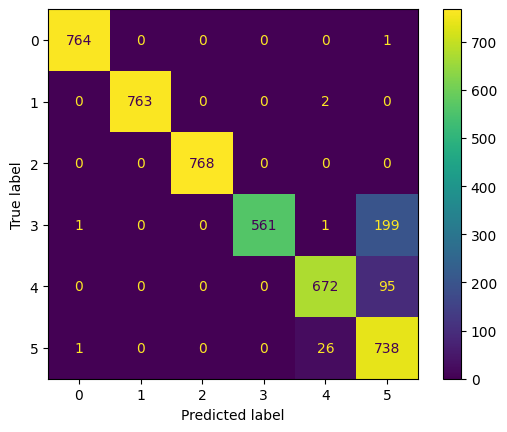

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set_style("darkgrid")
# plt.figure(figsize=(12,8))
colors = ["#807fff", "#fd7f82", "#84a97e"]
sns.set_palette(sns.color_palette(colors))
cm = confusion_matrix(all_y_true, all_y_pred)
disp= ConfusionMatrixDisplay(confusion_matrix=cm)
# import matplotlib.pyplot as plt
disp.plot()
# plt.show()

In [ ]:
print(classification_report(all_y_true, all_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       765
           1       1.00      1.00      1.00       765
           2       1.00      1.00      1.00       768
           3       1.00      0.74      0.85       762
           4       0.96      0.88      0.92       767
           5       0.71      0.96      0.82       765

    accuracy                           0.93      4592
   macro avg       0.95      0.93      0.93      4592
weighted avg       0.95      0.93      0.93      4592



In [ ]:
df_val = pd.read_csv('/content/drive/MyDrive/keypoints_final_val_256.csv').drop('Unnamed: 0',1)

<ipython-input-33-a67a6a83625a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_val = pd.read_csv('/content/drive/MyDrive/keypoints_final_val_256.csv').drop('Unnamed: 0',1)


In [ ]:
df_val[512:(512+256)]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,1.1
512,0.498204,0.325045,-0.280092,0.501241,0.313319,-0.268156,0.504362,0.314049,-0.268400,0.506766,...,0.471870,0.837673,0.210182,0.500933,0.863186,0.104345,0.443333,0.851790,0.119382,vriksh
513,0.497350,0.325974,-0.288618,0.500722,0.314890,-0.276627,0.503065,0.314921,-0.276867,0.505141,...,0.472278,0.835503,0.208577,0.500395,0.863170,0.087212,0.443110,0.854528,0.116487,vriksh
514,0.495267,0.325460,-0.297356,0.498773,0.313994,-0.284876,0.501191,0.314042,-0.285120,0.503176,...,0.471952,0.835442,0.214445,0.499915,0.863171,0.099858,0.443945,0.853825,0.122538,vriksh
515,0.491493,0.325750,-0.294950,0.494320,0.313288,-0.282730,0.497406,0.313282,-0.282968,0.499448,...,0.472206,0.835779,0.202842,0.499877,0.863686,0.083113,0.443558,0.854689,0.108751,vriksh
516,0.489973,0.323742,-0.254229,0.493444,0.311668,-0.241386,0.495739,0.311929,-0.241621,0.498364,...,0.472216,0.835538,0.191708,0.498591,0.861988,0.105938,0.445896,0.852941,0.097599,vriksh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,0.467412,0.332124,-0.161435,0.471836,0.319425,-0.143835,0.474202,0.319999,-0.143992,0.476708,...,0.475597,0.831335,0.103849,0.472315,0.709288,0.044309,0.463503,0.858247,0.023949,vriksh
764,0.468211,0.333263,-0.166658,0.472588,0.320537,-0.149037,0.474694,0.320821,-0.149193,0.477804,...,0.476207,0.828265,0.104060,0.471883,0.710419,0.036686,0.464533,0.858780,0.024493,vriksh
765,0.469188,0.333790,-0.164722,0.473254,0.320903,-0.147057,0.475751,0.320856,-0.147215,0.479065,...,0.475647,0.828216,0.094975,0.471934,0.709247,0.044217,0.465466,0.859077,0.015660,vriksh
766,0.469656,0.332489,-0.155165,0.473491,0.319844,-0.137579,0.476636,0.319893,-0.137735,0.479524,...,0.476204,0.829023,0.107831,0.472267,0.711030,0.044306,0.465084,0.859327,0.029730,vriksh


In [ ]:
tad =  df_val[512:512+256]
tad= tad.reset_index( drop=True)
# tad_feat = tad.drop('1.1',1)

In [ ]:
class YogaDataset(Dataset):
  def __init__(self, df):
    self.features = df.drop(['1.1'], axis=1)
    self.target = df['1.1']

  def __len__(self):
    return len(self.features)
  
  def __getitem__(self, index):
    features = self.features.loc[index]
    target = self.target[index]
    return torch.tensor(features.tolist()).float().to(device)

In [ ]:
tad = YogaDataset(tad)
tad_dl = DataLoader(tad, batch_size=16,drop_last=False)

In [ ]:
for batch in tad_dl:
  
  pred=(model(batch))
  _, is_correct = torch.max(pred.data,1)
  print(is_correct)

tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])
tensor([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])


In [ ]:
{'bhujan': 0, 'padmasan': 1, 'shav': 2, 'tadasana': 3, 'trik': 4, 'vriksh': 5}

{'bhujan': 0, 'padmasan': 1, 'shav': 2, 'tadasana': 3, 'trik': 4, 'vriksh': 5}

<ipython-input-45-d8ad0dcbd536>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


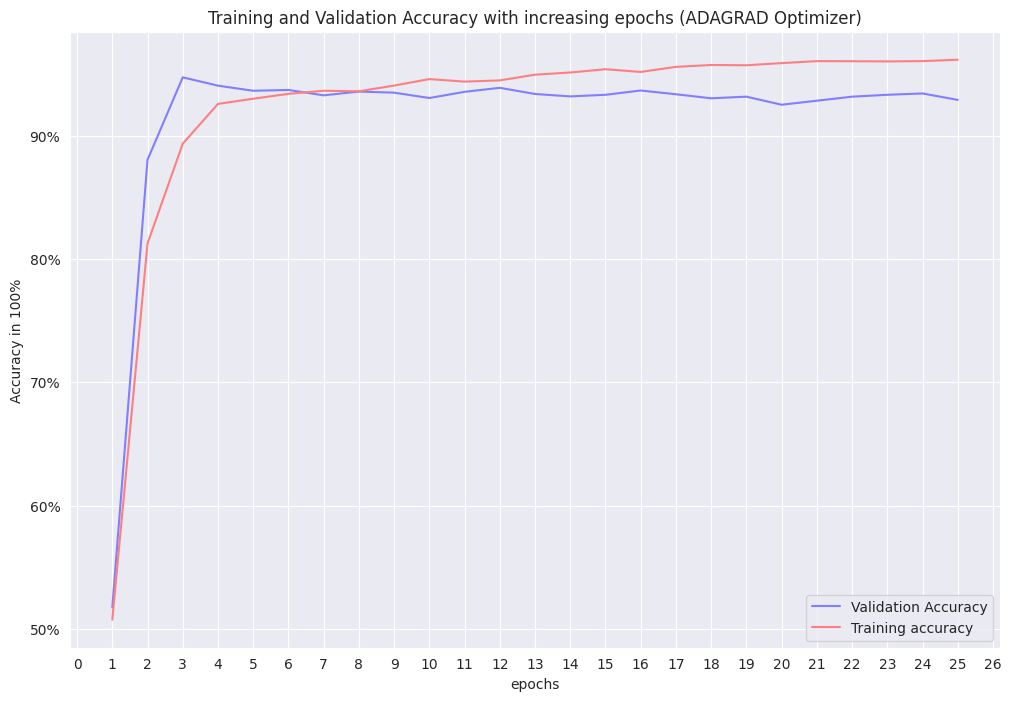

In [ ]:
epochs = np.arange(25)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(12,8))
colors = ["#807fff", "#fd7f82", "#84a97e"]
sns.set_palette(sns.color_palette(colors))
sns.lineplot(x=epochs, y=val_accuracies, label='Validation Accuracy')
sns.lineplot(x=epochs, y=train_accuracies , label='Training accuracy')
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
sns.set_style("darkgrid")

plt.xlabel('epochs')
plt.ylabel('Accuracy in 100%')
plt.title('Training and Validation Accuracy with increasing epochs (ADAGRAD Optimizer)')
plt.legend()
plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])
plt.grid('off')
plt.show()

<ipython-input-44-166b2d106282>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])


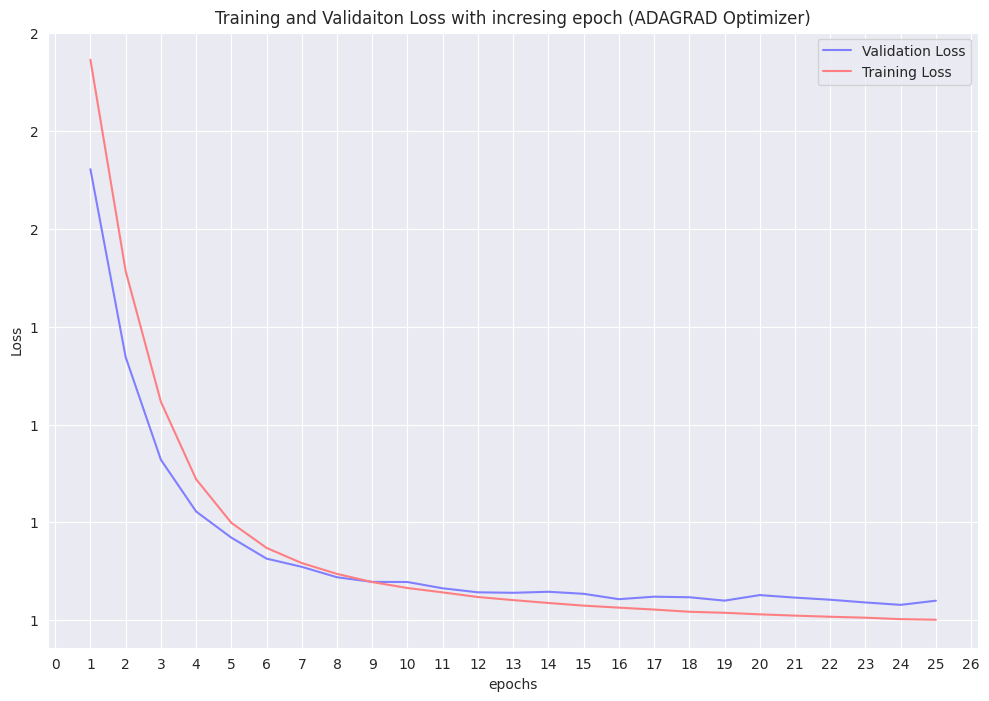

In [ ]:
epochs = np.arange(25) + 1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))
colors = ["#807fff", "#fd7f82", "#84a97e"]
sns.set_palette(sns.color_palette(colors))
sns.set_style("darkgrid")

plt.plot(epochs,  val_loss, label='Validation Loss')
plt.plot(epochs, train_loss, label='Training Loss')
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))
plt.title('Training and Validaiton Loss with incresing epoch (ADAGRAD Optimizer)')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.gca().set_yticklabels(['{:.0f}'.format(x) for x in plt.gca().get_yticks()])
plt.grid('off')
plt.show()

In [ ]:

# from google.colab import drive
# drive.mount('/content/drive')

file_path = ''

from glob import glob
import pandas as pd
import cv2 as cv2
import matplotlib.pyplot as plt
import os
import numpy as np
import torch
from sklearn.model_selection import train_test_split
!pip install mediapipe


import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

BG_COLOR = (192, 192, 192)
def landmark_det(image):
  with mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5) as pose:
    a = []
    image_height, image_width, _ = image.shape
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    for i in range(33):
      a.append((results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)].x ,results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)].y ,results.pose_landmarks.landmark[mp_pose.PoseLandmark(i)].z))
    b = []

    for i in a:
      for x in i:
        b.append(x)
    df = pd.DataFrame(b).T
    df = df.to_numpy()
    return df


import os


def listframe(path):
  local = []
  video = cv2.VideoCapture(path)
  frame_num = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
  f_img = 0
  count = 0
  while (count<frame_num): 
      try:
          success, cap = video.read()
          if count % (int(frame_num / 256)) == 0 and (f_img<256):
              df  = landmark_det(cap)
              local.append(df)
              f_img =f_img+1
              count = count+1
          else:
              count = count+1
          
      except:
        count = count+1
  print(f'done dong doing {path}')

  return local




In [ ]:
data = np.array(listframe("/content/317773255_5750429361701959_3783032898901447589_n.mp4"))
globals = []
for i in range(len(data)):
    for j in range(len(data[i])):
        globals.append(data[i][j])




In [ ]:
class YogaDataset(Dataset):
  def __init__(self, df):
    self.features = df
    # self.target = df['1.1']

  def __len__(self):
    return len(self.features)
  
  def __getitem__(self, index):
    features = self.features.loc[index]
    # target = self.target[index]
    return torch.tensor(features.tolist()).float().to(device)

In [ ]:
# total = []
# for i in range(len(globals)):
#   total.append((globals[i]))

df_test = pd.DataFrame(globals)



tad = YogaDataset(df_test)
tad_dl = DataLoader(tad, batch_size=16,drop_last=False)
for batch in tad_dl:
  
  pred=(model(batch))
  _, is_correct = torch.max(pred.data,1)
  print(is_correct)


In [ ]:
# torch.save(model.to('cpu').state_dict(), 'yoga_fulldatamodel_test.pth')